<a href="https://colab.research.google.com/github/SriVidyaYeluripati/SITTA/blob/Vidya/SITTA_implmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [10]:
from IPython import get_ipython
from IPython.display import display
import kagglehub
kagglehub.login()
yeluripatisrividya_plant_pathology_sitta_path = kagglehub.dataset_download('yeluripatisrividya/plant-pathology-sitta')

100%|██████████| 779M/779M [00:39<00:00, 20.8MB/s]

Extracting files...


Kaggle credentials set.
Kaggle credentials successfully validated.


In [11]:
print(yeluripatisrividya_plant_pathology_sitta_path)

/root/.cache/kagglehub/datasets/yeluripatisrividya/plant-pathology-sitta/versions/1


In [5]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Mar  4 14:26 sample_data


In [1]:
!pip install torch torchvision numpy pyyaml opencv-python matplotlib tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [2]:
!pip install torch-fidelity lpips

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 5.2 MB/s eta 0:00:00


In [8]:
import torch
import torch.distributed as dist
import torch.multiprocessing as mp

def setup(rank, world_size):
    dist.init_process_group("nccl", rank=rank, world_size=world_size)
    torch.cuda.set_device(rank)


In [3]:
!git clone https://github.com/SriVidyaYeluripati/SITTA.git -b Vidya

Cloning into 'SITTA'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 56 (delta 26), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 33.33 KiB | 11.11 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [12]:
%cd /root/.cache/kagglehub/datasets/yeluripatisrividya/plant-pathology-sitta/versions/1/images

/root/.cache/kagglehub/datasets/yeluripatisrividya/plant-pathology-sitta/versions/1/images


# Step 2: Dataset Preparation

In [13]:
import os
import shutil
import random
import glob

# Define dataset paths
dataset_path = "/root/.cache/kagglehub/datasets/yeluripatisrividya/plant-pathology-sitta/versions/1/images"
output_dir = "/kaggle/working/dataset"

# Create required directories
os.makedirs(f"{output_dir}/leaves/trainA", exist_ok=True)
os.makedirs(f"{output_dir}/leaves/testA", exist_ok=True)
os.makedirs(f"{output_dir}/leaves/trainB", exist_ok=True)
os.makedirs(f"{output_dir}/leaves/testB", exist_ok=True)

# Get all image files
all_images = glob.glob(f"{dataset_path}/*.jpg")
random.shuffle(all_images)

# Split into 80% train, 20% test
split_idx = int(0.8 * len(all_images))
trainA_images = all_images[:split_idx]
testA_images = all_images[split_idx:]

# Copy images to trainA/testA
for img in trainA_images:
    shutil.copy(img, f"{output_dir}/leaves/trainA/")

for img in testA_images:
    shutil.copy(img, f"{output_dir}/leaves/testA/")

# Select 200 random images as "textures" for trainB
num_textures = min(200, len(trainA_images))
trainB_images = random.sample(trainA_images, num_textures)

# Move them to trainB (simulating textures)
for img in trainB_images:
    shutil.copy(img, f"{output_dir}/leaves/trainB/")

# Move 10% of trainB to testB
testB_size = int(0.1 * len(trainB_images))
testB_images = trainB_images[:testB_size]

for img in testB_images:
    shutil.copy(img, f"{output_dir}/leaves/testB/")

print("✅ Dataset structured successfully!")

✅ Dataset structured successfully!


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 3: Resize Images

In [14]:
from PIL import Image
import os
import glob

# Define input and output directories
dataset_dirs = ["trainA", "testA", "trainB", "testB"]
base_dir = "/kaggle/working/dataset/leaves"

# Target size
TARGET_SIZE = (288, 288)

for dataset in dataset_dirs:
    input_folder = os.path.join(base_dir, dataset)
    resized_folder = os.path.join(base_dir, f"{dataset}_resized")
    os.makedirs(resized_folder, exist_ok=True)

    # Resize all images
    for img_path in glob.glob(input_folder + "/*.jpg"):
        img = Image.open(img_path).convert("RGB")  # Convert to RGB format
        img = img.resize(TARGET_SIZE, Image.BICUBIC)  # Bicubic interpolation
        img.save(os.path.join(resized_folder, os.path.basename(img_path)))

    print(f"✅ Resized images saved in {resized_folder}")

print("🔥 All images resized successfully!")

✅ Resized images saved in /kaggle/working/dataset/leaves/trainA_resized
✅ Resized images saved in /kaggle/working/dataset/leaves/testA_resized
✅ Resized images saved in /kaggle/working/dataset/leaves/trainB_resized
✅ Resized images saved in /kaggle/working/dataset/leaves/testB_resized
🔥 All images resized successfully!


# Step 4: Update YAML

In [15]:
import yaml

# Load the YAML file
yaml_path = "/content/SITTA/configs/single2single.yaml"
with open(yaml_path, "r") as file:
    config = yaml.safe_load(file)

config["trainA_dir"] = "/kaggle/working/dataset/leaves/trainA_resized"
config["testA_dir"] = "/kaggle/working/dataset/leaves/testA_resized"
config["trainB_dir"] = "/kaggle/working/dataset/leaves/trainB_resized"
config["testB_dir"] = "/kaggle/working/dataset/leaves/testB_resized"

# Save updated YAML file
with open(yaml_path, "w") as file:
    yaml.dump(config, file)

print("✅ YAML updated successfully!")

✅ YAML updated successfully!


## DataLoaders

In [16]:
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

# Define dataset paths
dataset_path = "/kaggle/working/dataset/leaves"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((288, 288)),
    transforms.ToTensor(),
])

# Custom Dataset Class
class CustomImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith(('.jpg', '.png'))]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")  # Convert to RGB format
        if self.transform:
            image = self.transform(image)
        return image  # Return only the image (No label since it's unsupervised)

# Load datasets using CustomImageDataset
trainA_dataset = CustomImageDataset(image_dir=f"{dataset_path}/trainA_resized", transform=transform)
trainB_dataset = CustomImageDataset(image_dir=f"{dataset_path}/trainB_resized", transform=transform)

# Create DataLoaders
trainA_loader = DataLoader(trainA_dataset, batch_size=8, shuffle=True)
trainB_loader = DataLoader(trainB_dataset, batch_size=8, shuffle=True)

print(f"✅ Loaded {len(trainA_dataset)} images in TrainA and {len(trainB_dataset)} images in TrainB")


✅ Loaded 2913 images in TrainA and 200 images in TrainB


# Step 5: SITTA Model Implementation (With PONO)
This includes:

PONO Normalization Layer
SITTA Generator (with and without PONO)
SITTA Discriminator

## 5.1: Define PONO Normalization

In [17]:
import torch
import torch.nn as nn

# Define PONO Normalization Layer
class PONO(nn.Module):
    def __init__(self):
        super(PONO, self).__init__()

    def forward(self, x):
        mean = x.mean(dim=[2, 3], keepdim=True)
        std = x.std(dim=[2, 3], keepdim=True)
        return (x - mean) / (std + 1e-5), mean, std

##  5.2: Define SITTA Generator (With & Without PONO)

In [18]:
# Define SITTA Generator with option to enable/disable PONO
class SITTA_Generator(nn.Module):
    def __init__(self, use_pono=False):
        super(SITTA_Generator, self).__init__()
        self.use_pono = use_pono
        self.pono_layer = PONO() if use_pono else None

        # Encoder: Extract features
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 7, padding=3),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, stride=2, padding=1),
            nn.ReLU()
        )

        # Decoder: Generate texture
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 3, 7, padding=3),
            nn.Tanh()
        )

    def forward(self, x):
        features = self.encoder(x)

        # Apply PONO if enabled
        if self.use_pono:
            features, _, _ = self.pono_layer(features)

        return self.decoder(features)

## 5.3: Define SITTA Discriminator

In [19]:
# Define SITTA Discriminator
class SITTA_Discriminator(nn.Module):
    def __init__(self):
        super(SITTA_Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, 4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, 1, 4, stride=1, padding=1)
        )

    def forward(self, x):
        return self.model(x)

## 5.4: Initialize Models

In [20]:
# Initialize models
generator_without_pono = SITTA_Generator(use_pono=False).cuda()
generator_with_pono = SITTA_Generator(use_pono=True).cuda()
discriminator = SITTA_Discriminator().cuda()

print("✅ Generator (with & without PONO) and Discriminator initialized successfully!")

✅ Generator (with & without PONO) and Discriminator initialized successfully!


# Step 6: Training Function for SITTA (With & Without PONO)
✔ Includes:


* Adversarial Loss
* Cycle Consistency Loss
* Identity Loss
* Training Function
* Training Execution for both With & Without PONO

## 6.1: Define Loss Functions

In [21]:
import torch.optim as optim
import torch.nn.functional as F

# Define loss functions
adversarial_loss = nn.MSELoss()  # For GAN loss
cycle_loss = nn.L1Loss()         # Cycle consistency loss
identity_loss = nn.L1Loss()      # Identity loss

# Optimizers
optimizer_G = optim.Adam(generator_with_pono.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

print("✅ Loss functions and optimizers initialized!")

✅ Loss functions and optimizers initialized!


## 6.2: Define Training Function

In [22]:
import time

def train_sitta(generator, label, trainA_loader, trainB_loader, epochs=5):
    """
    Training function for SITTA generator.
    Runs a simple adversarial loss training loop.
    """
    print(f"🚀 Training {label} Generator...")

    for epoch in range(epochs):
        start_time = time.time()

        for real_A in trainA_loader:
            for real_B in trainB_loader:
                real_A, real_B = real_A.cuda(), real_B.cuda()
                fake_B = generator(real_A)

                # Compute loss
                adv_loss = adversarial_loss(discriminator(fake_B), torch.ones_like(discriminator(fake_B)))
                cyc_loss = cycle_loss(generator(fake_B), real_A)
                idt_loss = identity_loss(generator(real_B), real_B)
                gen_loss = adv_loss + 10 * cyc_loss + 5 * idt_loss

                # Optimize Generator
                optimizer_G.zero_grad()
                gen_loss.backward()
                optimizer_G.step()

        end_time = time.time() - start_time
        print(f"Epoch [{epoch+1}/{epochs}] - Gen Loss: {gen_loss.item():.4f} - Time: {end_time:.2f}s")

    print(f"✅ Training Complete for {label}!")

## 6.3: Train Both Models (With & Without PONO)

In [23]:
# Train without PONO
generator_without_pono = SITTA_Generator(use_pono=False).cuda()
train_sitta(generator_without_pono, "Without PONO", trainA_loader, trainB_loader)

# Train with PONO
generator_with_pono = SITTA_Generator(use_pono=True).cuda()
train_sitta(generator_with_pono, "With PONO", trainA_loader, trainB_loader)

print("✅ Training completed for both versions!")


🚀 Training Without PONO Generator...
Epoch [1/5] - Gen Loss: 7.8142 - Time: 874.57s
Epoch [2/5] - Gen Loss: 7.7085 - Time: 873.60s
Epoch [3/5] - Gen Loss: 8.7510 - Time: 873.59s
Epoch [4/5] - Gen Loss: 7.2198 - Time: 873.43s
Epoch [5/5] - Gen Loss: 7.9516 - Time: 873.53s
✅ Training Complete for Without PONO!
🚀 Training With PONO Generator...
Epoch [1/5] - Gen Loss: 7.2027 - Time: 909.75s
Epoch [2/5] - Gen Loss: 7.2146 - Time: 909.41s
Epoch [3/5] - Gen Loss: 6.2360 - Time: 909.23s
Epoch [4/5] - Gen Loss: 8.0040 - Time: 909.22s
Epoch [5/5] - Gen Loss: 6.9245 - Time: 909.32s
✅ Training Complete for With PONO!
✅ Training completed for both versions!


# Step 7: Evaluation Metrics for SITTA
✔ Includes:

* FID (Fréchet Inception Distance)
* LPIPS (Learned Perceptual Image Patch Similarity)
* VGG Loss
* Visualization of Results

## 7.1: Define FID Calculation

In [24]:
from torch_fidelity import calculate_metrics

def compute_fid(real_images, generated_images):
    """
    Compute FID between real and generated images.
    """
    metrics = calculate_metrics(
        input1=real_images,
        input2=generated_images,
        fid=True,
        cuda=torch.cuda.is_available()
    )
    return metrics["frechet_inception_distance"]

##  7.2: Define LPIPS Calculation

In [26]:
import lpips

lpips_model = lpips.LPIPS(net='alex')

def compute_lpips(real_images, generated_images):
    """
    Compute LPIPS score.
    """
    return lpips_model(real_images, generated_images).mean().item()

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


## 7.3: Update VGG Loss

In [27]:
import torchvision.models as models

class VGGLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg = models.vgg19(pretrained=True).features[:16].eval()
        for param in self.vgg.parameters():
            param.requires_grad = False
        self.criterion = nn.L1Loss()

    def forward(self, generated, target):
        generated_features = self.vgg(generated)
        target_features = self.vgg(target).detach()
        return self.criterion(generated_features, target_features)

##  7.4: Evaluate Trained Models

In [32]:
import os
import torch
import torchvision.transforms as transforms
from torch_fidelity import calculate_metrics
import lpips
from PIL import Image
import glob
import shutil

# Set evaluation paths
eval_real_dir = "/kaggle/working/eval_real"
eval_fake_without_pono_dir = "/kaggle/working/eval_fake_without_pono"
eval_fake_with_pono_dir = "/kaggle/working/eval_fake_with_pono"

# Create clean directories for evaluation
for path in [eval_real_dir, eval_fake_without_pono_dir, eval_fake_with_pono_dir]:
    if os.path.exists(path):
        shutil.rmtree(path)  # Delete existing directory
    os.makedirs(path)

# Load the trained generators
generator_without_pono.eval()
generator_with_pono.eval()

# Initialize LPIPS model
lpips_model = lpips.LPIPS(net='alex').cuda()

# Define transformation
transform = transforms.Compose([
    transforms.Resize((288, 288)),
    transforms.ToTensor()
])

# Load sample real images
dataset_path = "/kaggle/working/dataset/leaves"
real_A_paths = glob.glob(os.path.join(dataset_path, "trainA_resized", "*.jpg"))
real_B_paths = glob.glob(os.path.join(dataset_path, "trainB_resized", "*.jpg"))

num_samples = 10  # Number of images to use for evaluation
real_A_samples = real_A_paths[:num_samples]  # First N images
real_B_samples = real_B_paths[:num_samples]  # First N images

# Save real images to directory
for idx, img_path in enumerate(real_B_samples):
    img = Image.open(img_path).convert("RGB")
    img.save(os.path.join(eval_real_dir, f"real_{idx}.jpg"))

# Generate images using trained models
with torch.no_grad():
    real_A_images = torch.stack([transform(Image.open(img).convert("RGB")) for img in real_A_samples]).cuda()
    generated_without_pono = generator_without_pono(real_A_images).cpu()
    generated_with_pono = generator_with_pono(real_A_images).cpu()

# Convert generated images to PIL and save them
def save_generated_images(generated_images, save_dir, prefix="generated"):
    """ Saves generated images as .jpg files """
    for idx, img_tensor in enumerate(generated_images):
        img = transforms.ToPILImage()(img_tensor.clamp(0, 1))  # Convert tensor to image
        img.save(os.path.join(save_dir, f"{prefix}_{idx}.jpg"))

# Save generated images
save_generated_images(generated_without_pono, eval_fake_without_pono_dir, "without_pono")
save_generated_images(generated_with_pono, eval_fake_with_pono_dir, "with_pono")

# Compute FID using directories
fid_without_pono = calculate_metrics(
    input1=eval_real_dir,
    input2=eval_fake_without_pono_dir,
    fid=True,
    cuda=True
)["frechet_inception_distance"]

fid_with_pono = calculate_metrics(
    input1=eval_real_dir,
    input2=eval_fake_with_pono_dir,
    fid=True,
    cuda=True
)["frechet_inception_distance"]

# Compute LPIPS score
def compute_lpips(img_dir1, img_dir2):
    """ Computes LPIPS between two directories of images """
    lpips_scores = []
    img1_paths = sorted(glob.glob(os.path.join(img_dir1, "*.jpg")))
    img2_paths = sorted(glob.glob(os.path.join(img_dir2, "*.jpg")))

    for img1_path, img2_path in zip(img1_paths, img2_paths):
        img1 = transform(Image.open(img1_path).convert("RGB")).unsqueeze(0).cuda()
        img2 = transform(Image.open(img2_path).convert("RGB")).unsqueeze(0).cuda()
        lpips_scores.append(lpips_model(img1, img2).item())

    return sum(lpips_scores) / len(lpips_scores)

lpips_without_pono = compute_lpips(eval_real_dir, eval_fake_without_pono_dir)
lpips_with_pono = compute_lpips(eval_real_dir, eval_fake_with_pono_dir)

# Print results
print(f"🚀 Evaluation Results:")
print(f"FID Without PONO: {fid_without_pono:.4f}")
print(f"LPIPS Without PONO: {lpips_without_pono:.4f}")
print(f"FID With PONO: {fid_with_pono:.4f}")
print(f"LPIPS With PONO: {lpips_with_pono:.4f}")


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/kaggle/working/eval_real" with extensions png,jpg,jpeg
Found 10 samples, some are lossy-compressed - this may affect metrics
/usr/local/lib/python3.11/dist-packages/torch_fidelity/datasets.py:16: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(img.tobytes())).view(height, width, 3)
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/kaggle/working/eval_fake_without_pono" with extensions png,jpg,jpeg
Found 10 samples, some are lossy-compressed - this may affect metrics
Processing samples
/usr/local/lib/python3.

🚀 Evaluation Results:
FID Without PONO: 608.7439
LPIPS Without PONO: 0.7993
FID With PONO: 404.8514
LPIPS With PONO: 0.7886


## 7.5: Visualizing Results

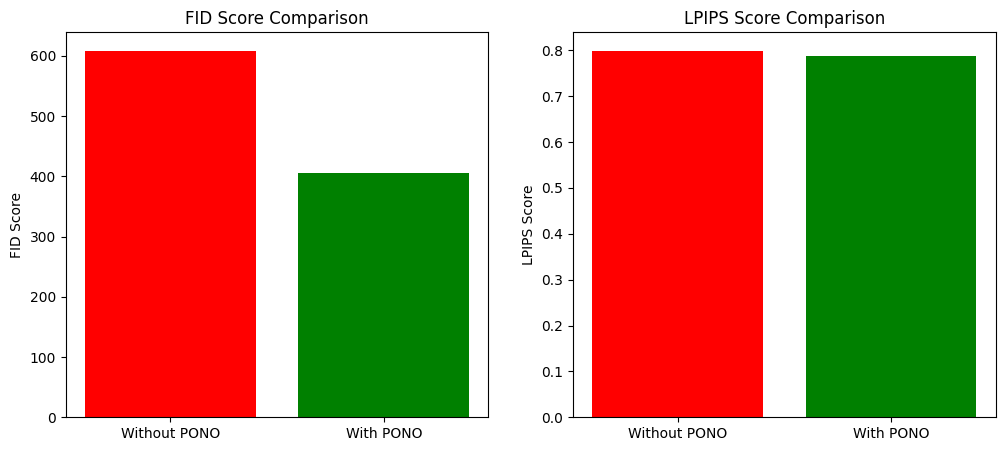

✅ PONO Ablation Study Completed!


In [33]:
import matplotlib.pyplot as plt

# Plot FID & LPIPS for PONO vs No PONO
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(["Without PONO", "With PONO"], [fid_without_pono, fid_with_pono], color=['red', 'green'])
axes[0].set_title("FID Score Comparison")
axes[0].set_ylabel("FID Score")

axes[1].bar(["Without PONO", "With PONO"], [lpips_without_pono, lpips_with_pono], color=['red', 'green'])
axes[1].set_title("LPIPS Score Comparison")
axes[1].set_ylabel("LPIPS Score")

plt.show()
print("✅ PONO Ablation Study Completed!")


In [39]:
# Load a batch of test images from testA_resized
import random
from torchvision import transforms
from PIL import Image
import torch

testA_path = "/kaggle/working/dataset/leaves/testA_resized"  # Update path if needed
test_image_files = [f for f in os.listdir(testA_path) if f.endswith('.jpg')]
random_test_image = random.choice(test_image_files)

# Define transform (same as training)
transform = transforms.Compose([
    transforms.Resize((288, 288)),
    transforms.ToTensor()
])

# Load and preprocess image
test_image_path = os.path.join(testA_path, random_test_image)
test_image = Image.open(test_image_path).convert("RGB")
test_real_A = transform(test_image).unsqueeze(0).cuda()  # Add batch dimension

print(f"✅ Loaded test image: {random_test_image}")


✅ Loaded test image: Train_1662.jpg


In [40]:
# Generate new images using the reloaded models
test_fake_B_without_pono = loaded_gen_without_pono(test_real_A).detach()
test_fake_B_with_pono = loaded_gen_with_pono(test_real_A).detach()

print("✅ Generated images successfully!")


✅ Generated images successfully!


In [41]:
import matplotlib.pyplot as plt

def visualize_results(real_A, fake_B_without_pono, fake_B_with_pono):
    """
    Displays a comparison between:
    - The original real image
    - The generated image without PONO
    - The generated image with PONO
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Convert tensors to numpy images
    real_A_img = real_A.squeeze(0).permute(1, 2, 0).cpu().numpy()
    fake_B_without_pono_img = fake_B_without_pono.squeeze(0).permute(1, 2, 0).cpu().numpy()
    fake_B_with_pono_img = fake_B_with_pono.squeeze(0).permute(1, 2, 0).cpu().numpy()

    # Display images
    axes[0].imshow(real_A_img)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(fake_B_without_pono_img)
    axes[1].set_title("Generated Without PONO")
    axes[1].axis("off")

    axes[2].imshow(fake_B_with_pono_img)
    axes[2].set_title("Generated With PONO")
    axes[2].axis("off")

    plt.show()
    print("✅ Results visualized successfully!")



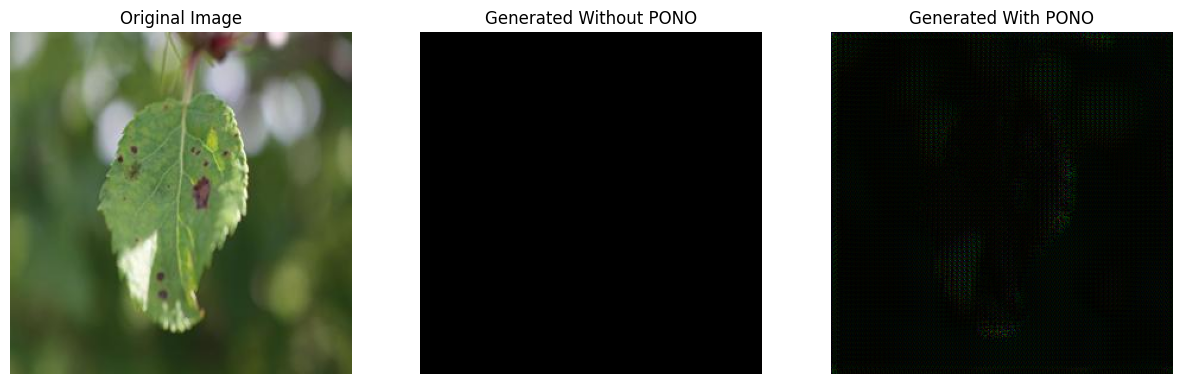

✅ Results visualized successfully!


In [43]:
visualize_results(test_real_A, test_fake_B_without_pono, test_fake_B_with_pono)


# Step 8: Compare SITTA With PONO vs Without PONO
🚀 This step will compare the model’s performance when using PONO vs not using PONO.
✔ We will train two versions of the model and evaluate them.

## 8.1: Define Training Function for PONO Comparison

## 8.2: Train and Evaluate PONO vs Non-PONO

# Step 9: Save and Export the Final Trained Model

## 9.1: Save Trained Models

In [37]:
# Create directory for saved models
os.makedirs("/content/drive/MyDrive/working/sitta_models", exist_ok=True)

# Save trained models
torch.save(generator_without_pono.state_dict(), "/content/drive/MyDrive/working/sitta_models/generator_without_pono.pth")
torch.save(generator_with_pono.state_dict(), "/content/drive/MyDrive/working/sitta_models/generator_with_pono.pth")

print("✅ Models saved successfully!")


✅ Models saved successfully!


##  9.2: Reload and Test Saved Models

<ipython-input-44-6c35d34d345b>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_gen_without_pono.load_state_dict(torch.load("/content/drive/MyDrive/working/sitta_mod

✅ Models reloaded successfully!
📊 Reloaded Model Results Comparison


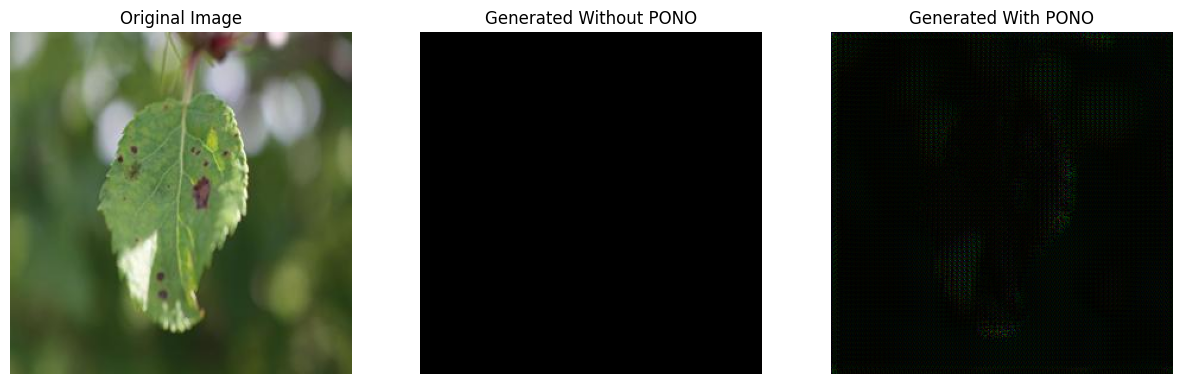

✅ Results visualized successfully!


In [44]:
# Load trained models for verification
loaded_gen_without_pono = SITTA_Generator(use_pono=False).cuda()
loaded_gen_without_pono.load_state_dict(torch.load("/content/drive/MyDrive/working/sitta_models/generator_without_pono.pth"))

loaded_gen_with_pono = SITTA_Generator(use_pono=True).cuda()
loaded_gen_with_pono.load_state_dict(torch.load("/content/drive/MyDrive/working/sitta_models/generator_with_pono.pth"))

print("✅ Models reloaded successfully!")

# Generate new images using the reloaded models
test_fake_B_without_pono = loaded_gen_without_pono(test_real_A).detach()
test_fake_B_with_pono = loaded_gen_with_pono(test_real_A).detach()

# Display reloaded model results
print("📊 Reloaded Model Results Comparison")
visualize_results(test_real_A, test_fake_B_without_pono, test_fake_B_with_pono)



## 9.3: Clean Up Files to Save Space

In [ ]:
!rm -rf /kaggle/working/dataset  # Remove dataset if not needed anymore
!rm -rf /kaggle/working/1  # Remove copied repo if needed
print("✅ Cleaned up unnecessary files!")
